# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import Sequential
from tensorflow import keras
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Lambda, Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.saving import register_keras_serializable
import speech_recognition as sr
import pyttsx3
import webbrowser  
import cv2
import pickle

# Loading Test and Train Dataset

In [2]:
print(os.listdir("C:/Users/e430372/Downloads/FER"))
train_path = "C:/Users/e430372/Downloads/FER/train"
val_path = "C:/Users/e430372/Downloads/FER/test"

['test', 'train']


In [3]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

# Data Visualisation

In [6]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

Angry: 



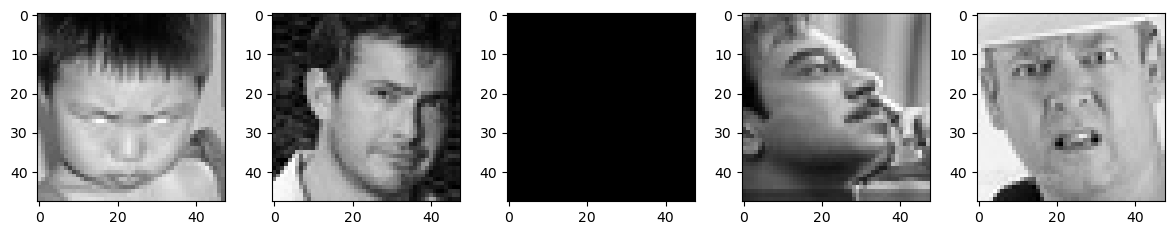

In [7]:
print('Angry: ')
print()
plot_images(train_path+'/angry')

Disgust: 



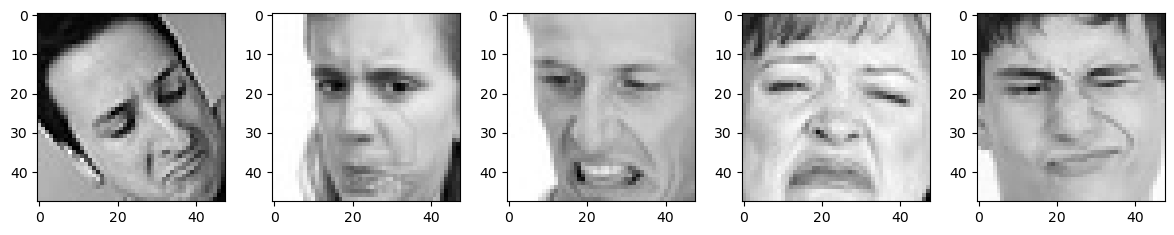

In [8]:
print('Disgust: ')
print()
plot_images(train_path+'/disgust')

Fear: 



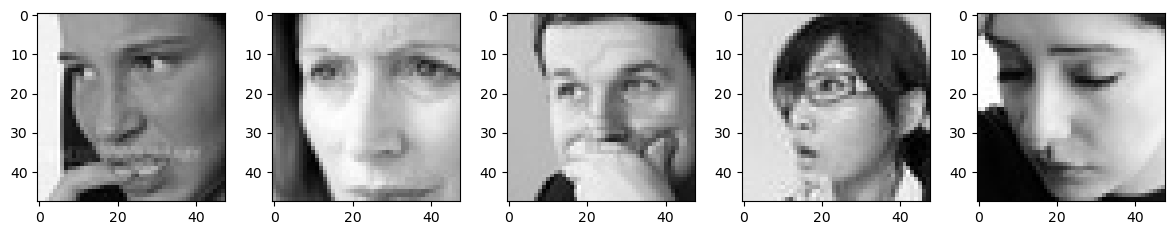

In [9]:
print('Fear: ')
print()
plot_images(train_path+'/fear')

Happy: 



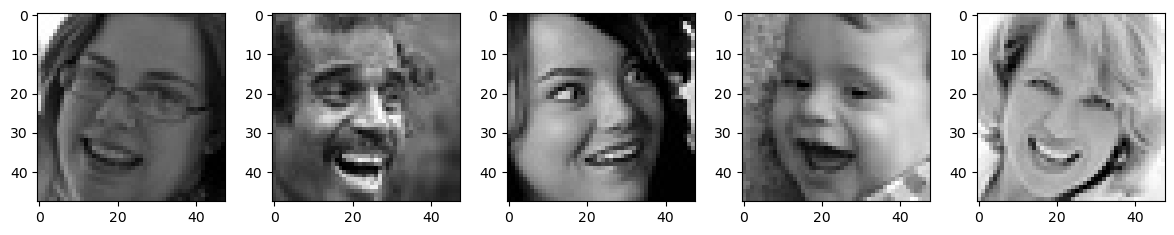

In [10]:
print('Happy: ')
print()
plot_images(train_path+'/happy')

Neutral: 



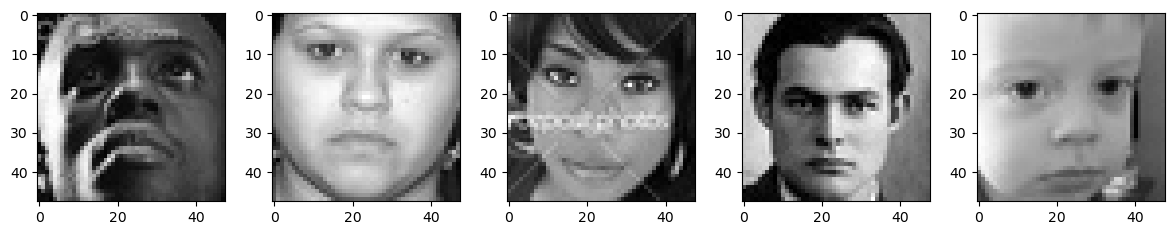

In [11]:
print('Neutral: ')
print()
plot_images(train_path+'/neutral')

Sad: 



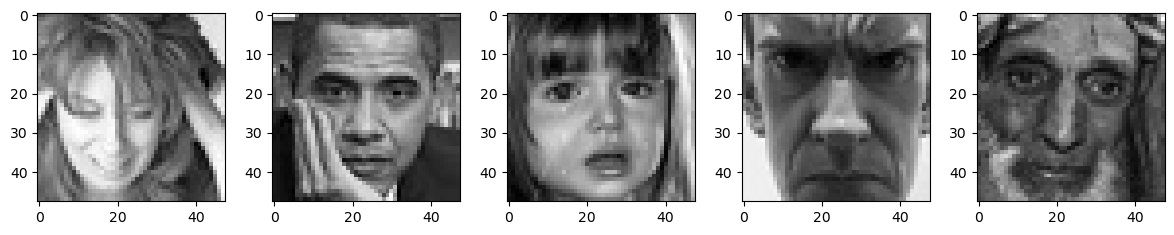

In [12]:
print('Sad: ')
print()
plot_images(train_path+'/sad')

Surprise: 



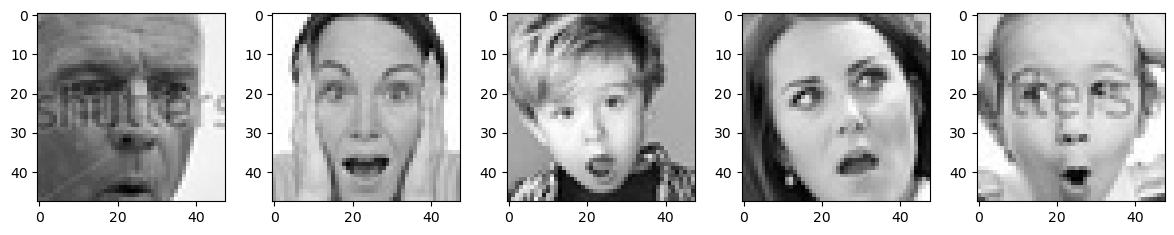

In [13]:
print('Surprise: ')
print()
plot_images(train_path+'/surprise')

In [14]:
emotions = os.listdir("C:/Users/e430372/Downloads/FER/train")
for emotion in emotions:
    count = len(os.listdir(f'C:/Users/e430372/Downloads/FER/train/{emotion}'))
    print(f'{emotion} faces={count}')

angry faces=3995
disgust faces=436
fear faces=4097
happy faces=7215
neutral faces=4965
sad faces=4830
surprise faces=3171


In [15]:
emotions = os.listdir("C:/Users/e430372/Downloads/FER/test")
for emotion in emotions:
    count = len(os.listdir(f'C:/Users/e430372/Downloads/FER/train/{emotion}'))
    print(f'{emotion} faces={count}')

angry faces=3995
disgust faces=436
fear faces=4097
happy faces=7215
neutral faces=4965
sad faces=4830
surprise faces=3171


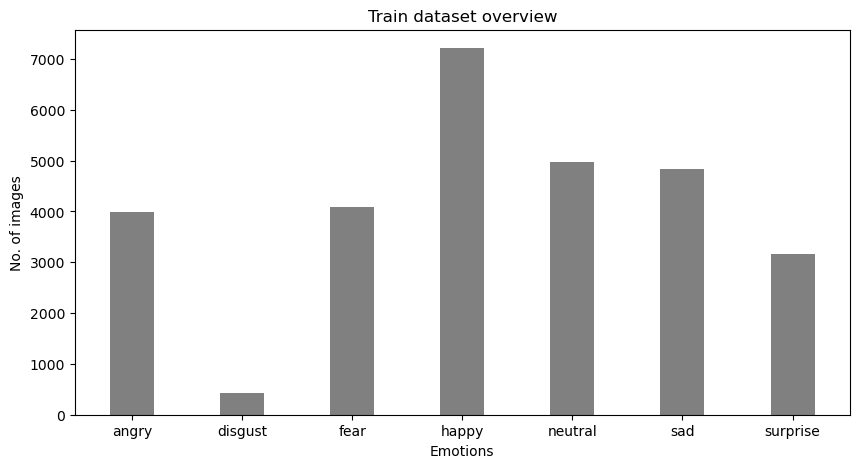

In [16]:
emotions = os.listdir("C:/Users/e430372/Downloads/FER/train")
values = [len(os.listdir(f'C:/Users/e430372/Downloads/FER/train/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(emotions, values, color ='grey',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Train dataset overview")
plt.show()

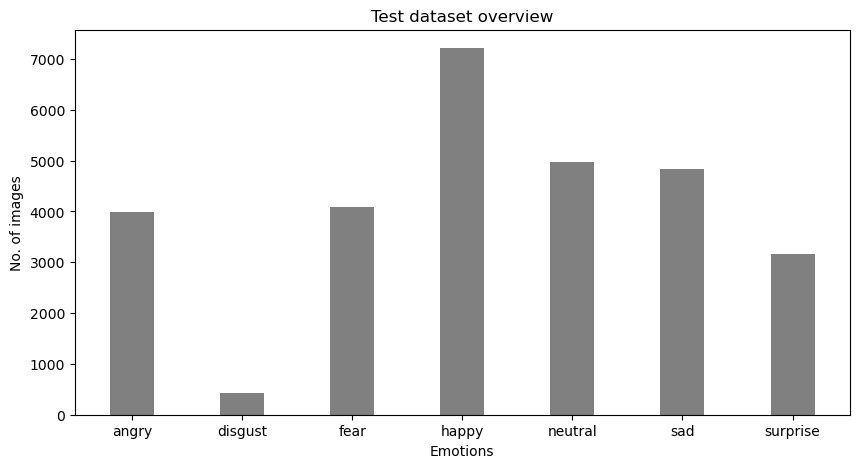

In [17]:
emotions = os.listdir("C:/Users/e430372/Downloads/FER/test")
values = [len(os.listdir(f'C:/Users/e430372/Downloads/FER/train/{emotion}')) for emotion in emotions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(emotions, values, color ='grey',
        width = 0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Test dataset overview")
plt.show()

# Sequential CNN Model Training

In [34]:
from tensorflow.keras import layers, models, regularizers

num_epochs = 200
number_of_classes = 7
input_shape = (48, 48, 1)  # Example input shape for grayscale images

model_cnn = models.Sequential()

# Use Input layer
model_cnn.add(layers.Input(shape=input_shape))

# CNN Layers
model_cnn.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2), strides=2))

model_cnn.add(layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model_cnn.add(layers.MaxPool2D(pool_size=(2,2), strides=2))

# Fully Connected Layers
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation="relu"))

# Output Layer with L2 Regularization
model_cnn.add(layers.Dense(number_of_classes, kernel_regularizer=regularizers.l2(0.01), activation="softmax"))



In [35]:
model_cnn.add(layers.Dense(number_of_classes,kernel_regularizer = regularizers.l2(0.01),activation= "softmax"))
model_cnn.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │             903 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,111 (617.62 KB)

 Trainable params: 158,111 (617.62 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
STEP_SIZE_TRAIN = max(1, train_generator.n // train_generator.batch_size)
STEP_SIZE_VAL   = max(1, val_generator.n // val_generator.batch_size)


In [37]:
history_cnn = model_cnn.fit(
    x=train_generator, 
    steps_per_epoch=STEP_SIZE_TRAIN, 
    epochs=num_epochs, 
    validation_data=val_generator, 
    validation_steps=STEP_SIZE_VAL
)



Epoch 1/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2496 - loss: 1.2105 - val_accuracy: 0.2471 - val_loss: 1.2105
Epoch 2/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1875 - loss: 1.2161 - val_accuracy: 0.2473 - val_loss: 1.2105
Epoch 3/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2543 - loss: 1.2095 - val_accuracy: 0.2471 - val_loss: 1.2104
Epoch 4/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2500 - loss: 1.2119 - val_accuracy: 0.2473 - val_loss: 1.2103
Epoch 5/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2506 - loss: 1.2100 - val_accuracy: 0.2475 - val_loss: 1.2102
Epoch 6/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2812 - loss: 1.2085 - val_accuracy: 0.2475 - val_loss: 1.2102
Epoch 7/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.2524 - loss: 1.2095 - val_accuracy: 0.2473 - val_loss: 1.2101
Epoch 8/200
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2188 - loss: 1.211

NameError: name 'pickle' is not defined

In [40]:
# Save training history
with open('training_history_cnn.pkl', 'wb') as file:
    pickle.dump(history_cnn.history, file)

print("Training history saved successfully!")

# Save model
models.save_model(model_cnn, 'C:/Users/e430372/Downloads/CNN1.keras')
print("Model saved successfully!")

Training history saved successfully!
Model saved successfully!


# CNN Model Evaluation

In [8]:
model_cnn=models.load_model('C:/Users/e430372/Downloads/CNN1.keras')
model_cnn.evaluate(val_generator,steps=STEP_SIZE_VAL)

C:\Users\e430372\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.2430 - loss: 1.2098


[1.2097445726394653, 0.2466517835855484]

# ResNet

In [9]:
# Register the custom grayscale_to_rgb function as Keras serializable
@register_keras_serializable()
def grayscale_to_rgb(x):
    """Convert a grayscale image to RGB by replicating the grayscale channel."""
    return tf.image.grayscale_to_rgb(x)

input_shape = (48, 48, 1)  # Your original grayscale input shape

# Create a Lambda layer to convert grayscale to RGB on the fly
input_tensor = Input(shape=input_shape)
rgb_tensor = Lambda(grayscale_to_rgb)(input_tensor)

# Now use rgb_tensor as the input to your ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=rgb_tensor)
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer for 7 emotions

# Create the final model, using the original input_tensor as input
model_resnet = Model(inputs=input_tensor, outputs=predictions)

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=5, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)
models.save_model(model_resnet, 'C:/Users/e430372/Downloads/Resnet.keras')

with open('C:/Users/e430372/Downloads/training_history_resnet.pkl', 'wb') as file:
    pickle.dump(history_resnet.history, file)

print("Training history saved successfully!")

Epoch 1/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 553s 1s/step - accuracy: 0.4204 - loss: 1.6483 - val_accuracy: 0.1169 - val_loss: 2.6418
Epoch 2/5
  1/448 ━━━━━━━━━━━━━━━━━━━━ 6:46 909ms/step - accuracy: 0.4688 - loss: 1.2059

C:\Users\e430372\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.4688 - loss: 1.2059 - val_accuracy: 0.1165 - val_loss: 2.6679
Epoch 3/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 448s 999ms/step - accuracy: 0.5638 - loss: 1.1667 - val_accuracy: 0.5254 - val_loss: 1.2790
Epoch 4/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.6094 - loss: 0.9849 - val_accuracy: 0.5278 - val_loss: 1.2795
Epoch 5/5
448/448 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.6156 - loss: 1.0428 - val_accuracy: 0.5526 - val_loss: 1.2198
Training history saved successfully!


# ResNet Model Evaluation

In [11]:
model_resnet=models.load_model('C:/Users/e430372/Downloads/Resnet.keras')
model_resnet.evaluate(val_generator,steps=STEP_SIZE_VAL)

112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 190ms/step - accuracy: 0.5566 - loss: 1.2027


[1.2197600603103638, 0.552734375]

# Training History for CNN Model

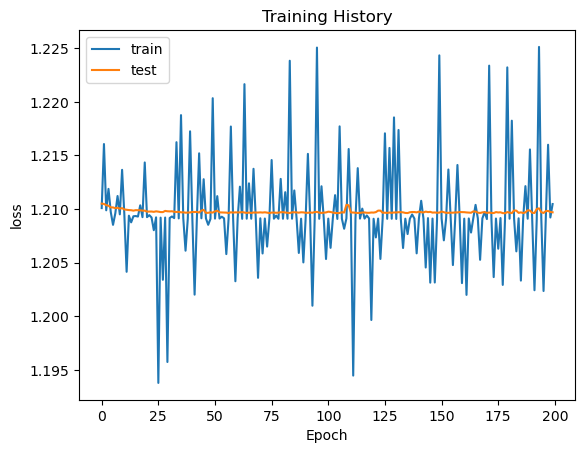

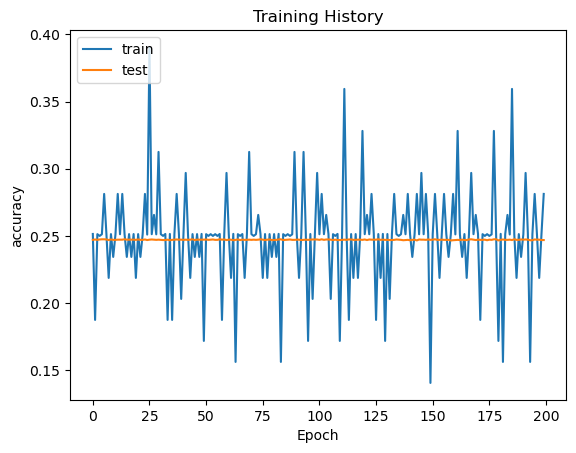

112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


In [19]:
with open("training_history_cnn.pkl", "rb") as file:
    history_cnn = pickle.load(file)  # Load the pickle object
keys=history_cnn.keys()
model_cnn=models.load_model('C:/Users/e430372/Downloads/CNN1.keras')

def show_train_history(hisData,train,test): 
    plt.plot(hisData[train])
    plt.plot(hisData[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history_cnn, 'loss', 'val_loss')
show_train_history(history_cnn, 'accuracy', 'val_accuracy')

val_generator.reset()
pred=model_cnn.predict(val_generator,steps=STEP_SIZE_VAL,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

# Training History for ResNet

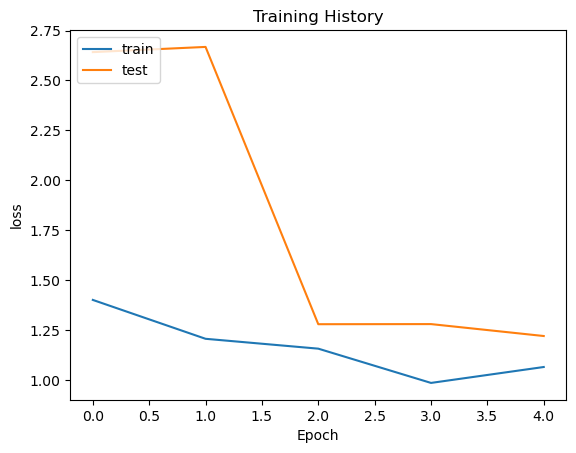

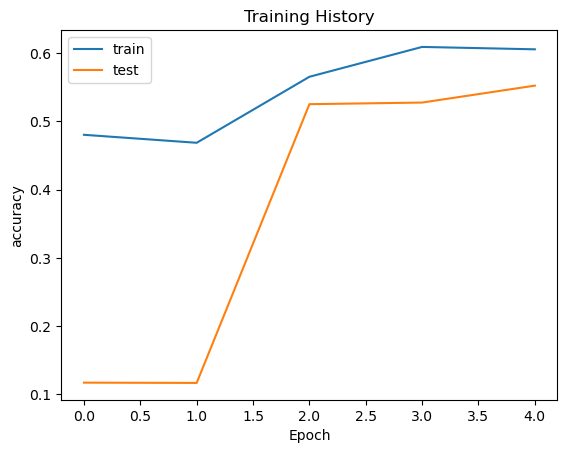

112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step


In [23]:
with open("C:/Users/e430372/Downloads/training_history_resnet.pkl", "rb") as file:
    history_resnet = pickle.load(file) 
keys=history_resnet.keys()
model_resnet=models.load_model('C:/Users/e430372/Downloads/Resnet.keras')
def show_train_history(hisData,train,test): 
    plt.plot(hisData[train])
    plt.plot(hisData[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history_resnet, 'loss', 'val_loss')
show_train_history(history_resnet, 'accuracy', 'val_accuracy')

val_generator.reset()
pred=model_resnet.predict(val_generator,steps=STEP_SIZE_VAL,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

# Utils 

In [24]:
r = sr.Recognizer()
engine = pyttsx3.init()
# Function to convert text to speech
def ask():
    engine.say("How are you feeling today")
    engine.runAndWait()
    
def SpeakText(command):

    # Initialize the engine
    engine = pyttsx3.init()
    engine.say(f'You seem to be {command}')
    engine.say("Let me play you some interesting music to refresh your mood")
    if(command=="angry" or command=="disgust" or command=="fear" or command=="surprise"):
        url= 'https://open.spotify.com/playlist/42rb18eADeFy3ywruwwG3i' 
        webbrowser.open_new_tab(url) 
    elif(command=="sad"):
        url= 'https://open.spotify.com/playlist/7r1ijsHcbL1dLcLFtnNRmi' 
        webbrowser.open_new_tab(url) 
    elif(command=="happy" or command=="neutral"):
        url= 'https://open.spotify.com/playlist/47X8CcLloML4Fz5Vq9trYL' 
        webbrowser.open_new_tab(url) 
    engine.runAndWait()

In [25]:
def speechtotext():
    q=0
    while(q!=1):
        try:
            ask()
            with sr.Microphone() as source2:
                q=1
                r.adjust_for_ambient_noise(source2, duration=0.2)
                audio2 = r.listen(source2)
                MyText = r.recognize_google(audio2)
                MyText = MyText.lower()
                SpeakText(MyText)
                return MyText

        except sr.RequestError as e:
            print("Could not request results; {0}".format(e))

        except sr.UnknownValueError:
            print("unknown error occurred")
            q=1

In [26]:
def image1():
    import cv2 as cv
    cam_port = 0
    cam = cv.VideoCapture(cam_port)
    result, image = cam.read()
    if result:
        cv.imwrite("C:/Users/e430372/Downloads/image2/image.jpg", image)
        cv.waitKey(0)
    else:
        print("No image detected. Please! try again")
    cam.release()
    cv.destroyAllWindows()
    import cv2

    # Read the input image
    img = cv2.imread("C:/Users/e430372/Downloads/image2/image.jpg")

    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the cascade
    face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change 
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        faces = img[y:y + h, x:x + w]
        cv2.imshow("face",faces)
        cv2.imwrite("C:/Users/e430372/Downloads/images/abc/face1.jpg", faces)

    cv2.waitKey()
    from PIL import Image,ImageOps
    im = Image.open(r"C:/Users/e430372/Downloads/images/abc/face1.jpg")
    im2=ImageOps.grayscale(im)
    im2.save("C:/Users/e430372/Downloads/images/abc/face1.jpg")
    im2.show()
    model2=models.load_model('C:/Users/e430372/Downloads/CNN1.keras')
    path = "C:/Users/e430372/Downloads/images"
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
            path,
            target_size=target_size,
            batch_size=1,
            color_mode="grayscale",
            class_mode='categorical',
            shuffle=True)
    cnn = model2.predict(generator, steps=1)
    predicted_class_indices=np.argmax(cnn,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions1 = [labels[k] for k in predicted_class_indices]
    print("Emotion:",predictions1[0])
    SpeakText(predictions1[0])

In [27]:
def image2():
    import cv2 as cv
    cam_port = 0
    cam = cv.VideoCapture(cam_port)
    result, image = cam.read()
    if result:
        cv.imwrite("C:/Users/e430372/Downloads/images1/abc/image.jpg", image)
        cv.waitKey(0)
    else:
        print("No image detected. Please! try again")
    cam.release()
    cv.destroyAllWindows()
    import cv2

    # Read the input image
    img = cv2.imread("C:/Users/e430372/Downloads/images1/abc/image.jpg")

    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the cascade
    face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change 
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        faces = img[y:y + h, x:x + w]
        cv2.imshow("face",faces)
        cv2.imwrite("C:/Users/e430372/Downloads/images/abc/face1.jpg", faces)
    cv2.waitKey()
    from PIL import Image,ImageOps
    im = Image.open(r"C:/Users/e430372/Downloads/images/abc/face1.jpg")
    im2=ImageOps.grayscale(im)
    im2.save("C:/Users/e430372/Downloads/images/abc/face1.jpg")
    im2.show()
    model2=models.load_model('C:/Users/e430372/Downloads/Resnet.keras')
    path = "C:/Users/e430372/Downloads/images"
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
            path,
            target_size=target_size,
            batch_size=1,
            color_mode="grayscale",
            class_mode='categorical',
            shuffle=True)
    cnn = model2.predict(generator, steps=1)
    predicted_class_indices=np.argmax(cnn,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    predictions1 = [labels[k] for k in predicted_class_indices]
    print("Emotion:",predictions1[0])
    SpeakText(predictions1[0])

# Input 

In [ ]:
print("Press 1:To Interact with model using voice \n")
print("Press 2:To Interact with model with facial emotion recognition \n")
i=int(input("Enter your choice"))
if(i==1):
    r=speechtotext()
    print(r)
elif(i==2):
    image2()
#elif(i==3):
#image1()